In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [65]:
validation = './validation.h5'

In [66]:
fid = h5py.File(testing,'r')

In [67]:
fid.keys()

<KeysViewHDF5 ['label', 'sen1', 'sen2']>

In [68]:
print('INFO:    The names of variables in the file of \''+validation+'\':')
#print fid.keys()

# load the data into memory
print('INFO:    Loading sentinel-1 data patches ...')
s1 = np.array(fid['sen1'])
print('INFO:    Sentinel-1 data dimension:')
print(s1.shape)

INFO:    The names of variables in the file of './validation.h5':
INFO:    Loading sentinel-1 data patches ...
INFO:    Sentinel-1 data dimension:
(24188, 32, 32, 8)


In [69]:
print('INFO:    Loading sentinel-2 data patches ...')
s2 = np.array(fid['sen2'])
print('INFO:    Sentinel-2 data dimension:')
print(s2.shape)

INFO:    Loading sentinel-2 data patches ...
INFO:    Sentinel-2 data dimension:
(24188, 32, 32, 10)


In [70]:
print('INFO:    Loading label ...')
lab = np.array(fid['label'])
print('INFO:    Label dimension:')
print(lab.shape)

INFO:    Loading label ...
INFO:    Label dimension:
(24188, 17)


In [41]:
def check_one_hot_coding(vector, axis=1):
    """Returns list of indeces with erroneous vectors."""
    return np.where(vector.sum(axis=axis) != 1)[0]

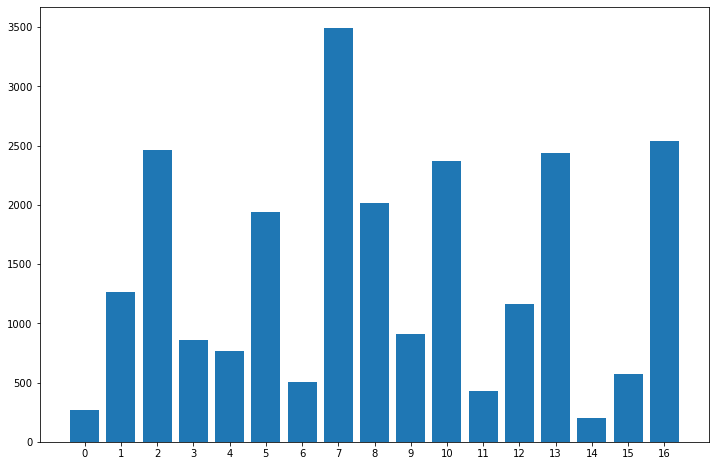

In [64]:
label_count = lab.cumsum(0)[-1]
classes = list(range(17))

plt.figure(figsize=(12, 8))
plt.bar(classes, label_count)
plt.xticks(classes, classes)
plt.show()

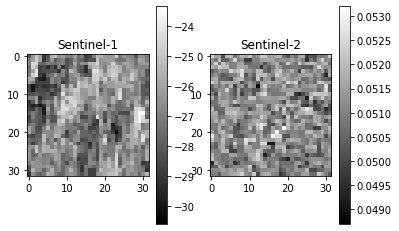

In [18]:
plt.subplot(121)
plt.imshow(10*np.log10(s1[0,:,:,4]),cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-1')

plt.subplot(122)
plt.imshow(s2[0,:,:,1],cmap=plt.cm.get_cmap('gray'));
plt.colorbar()
plt.title('Sentinel-2')

plt.show()

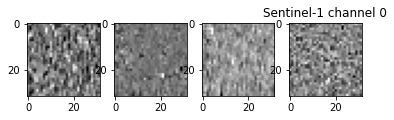

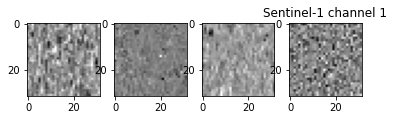

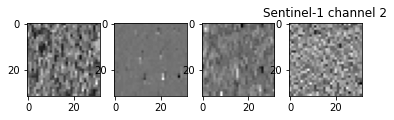

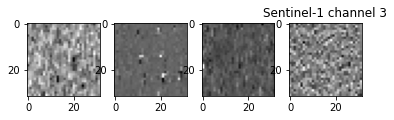

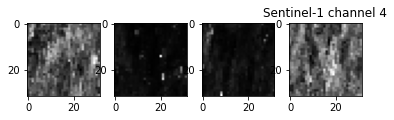

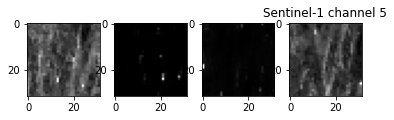

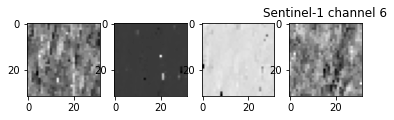

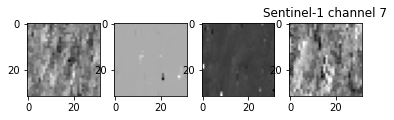

In [28]:
for i in range(8):
    plt.subplot(141)
    plt.imshow(s1[0,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.subplot(142)
    plt.imshow(s1[1,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.subplot(143)
    plt.imshow(s1[2,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.subplot(144)
    plt.imshow(s1[3,:,:,i],cmap=plt.cm.get_cmap('gray'))
    plt.title(f'Sentinel-1 channel {i}')
    plt.show()